In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


sns.set()
sns.color_palette("Set2")
np.random.seed(177)

In [2]:
#Get data
df = pd.read_excel("DryBeanDataset/Dry_Bean_Dataset.xlsx")
unique_entries = set(df['Class'])
df.replace(unique_entries, np.arange(len(unique_entries)), inplace=True)
df.head(25)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,3
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,3
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,3
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,3
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,3
5,30279,634.927,212.560556,181.510182,1.171067,0.520401,30600,196.347702,0.775688,0.989510,0.943852,0.923726,0.007020,0.003153,0.853270,0.999236,3
6,30477,670.033,211.050155,184.039050,1.146768,0.489478,30970,196.988633,0.762402,0.984081,0.853080,0.933374,0.006925,0.003242,0.871186,0.999049,3
7,30519,629.727,212.996755,182.737204,1.165591,0.513760,30847,197.124320,0.770682,0.989367,0.967109,0.925480,0.006979,0.003158,0.856514,0.998345,3
8,30685,635.681,213.534145,183.157146,1.165852,0.514081,31044,197.659696,0.771561,0.988436,0.954240,0.925658,0.006959,0.003152,0.856844,0.998953,3
9,30834,631.934,217.227813,180.897469,1.200834,0.553642,31120,198.139012,0.783683,0.990810,0.970278,0.912125,0.007045,0.003008,0.831973,0.999061,3


In [3]:
dataSet = df.to_numpy()
train, test = train_test_split(dataSet, test_size=0.2, shuffle=True)

k-NN - metrics:
* Minkowski - $D(\mathbf{x}_i,{\mathbf x}_j)=\left(\sum_{l=1}^d |x_{il}-x_{jl}|^{1/p}\right)^p \tag{1}$
* Manhattan - $D(\mathbf{x}_i,{\mathbf x}_j)=\sum_{l=1}^d |x_{il}-x_{jl}| \tag{2}$
* Euclidean - $D(\mathbf{x}_i,{\mathbf x}_j)=\sqrt{\sum_{l=1}^d (x_{il}-x_{jl})^{2}} \tag{3}$

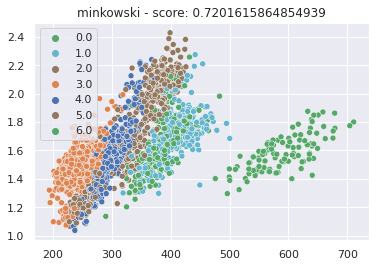

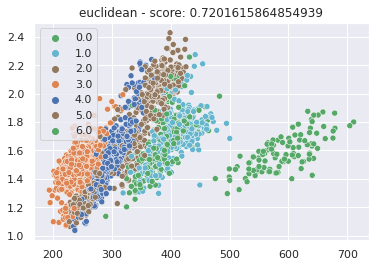

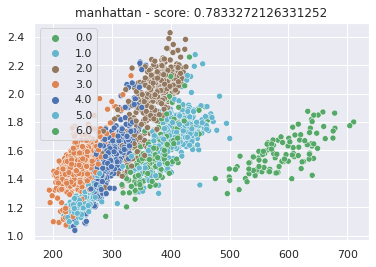

In [4]:
from sklearn.neighbors import KNeighborsClassifier

for metr in ["minkowski", "euclidean", "manhattan"]:
    model = KNeighborsClassifier(n_neighbors=5, metric=metr).fit(train[:,:-1], train[:,-1])

    out = model.predict(test[:,:-1])
    score = model.score(test[:,:-1], test[:,-1])


    palette = dict(zip(out, sns.color_palette(n_colors=len(out))))
    plt.title(metr + " - score: " + str(score))
    sns.scatterplot(x=test[:,2], y=test[:,4], hue=out, palette=palette )
    plt.show()



Decision Tree
* losowo
* korzystając z algorytmu wybranego dla tych danych (np. entropia lub gini)

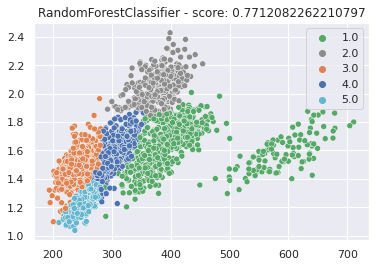

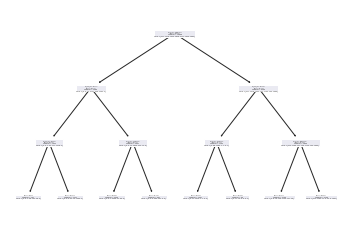

In [5]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

model = DecisionTreeClassifier(max_depth=3).fit(train[:,:-1], train[:,-1])

out = model.predict(test[:,:-1])
score = model.score(test[:,:-1], test[:,-1])

palette = dict(zip(out, sns.color_palette(n_colors=len(out))))
plt.title("RandomForestClassifier - score: " + str(score))
sns.scatterplot(x=test[:,2], y=test[:,4], hue=out, palette=palette )
plt.show()
a = plot_tree(model)


Regression
* $\min_{w} || X w - y||_2^2$ - default
* $\min_{w} || X w - y||_2^2 + \alpha ||w||_2^2$ - Ridge
* $\min_{w} { \frac{1}{2n_{\text{samples}}} ||X w - y||_2 ^ 2 + \alpha ||w||_1}$ - Lasso
* $\min_{w} { \frac{1}{2n_{\text{samples}}} ||X w - y||_2 ^ 2 + \alpha \rho ||w||_1 +
\frac{\alpha(1-\rho)}{2} ||w||_2 ^ 2}$ - Elastic Net

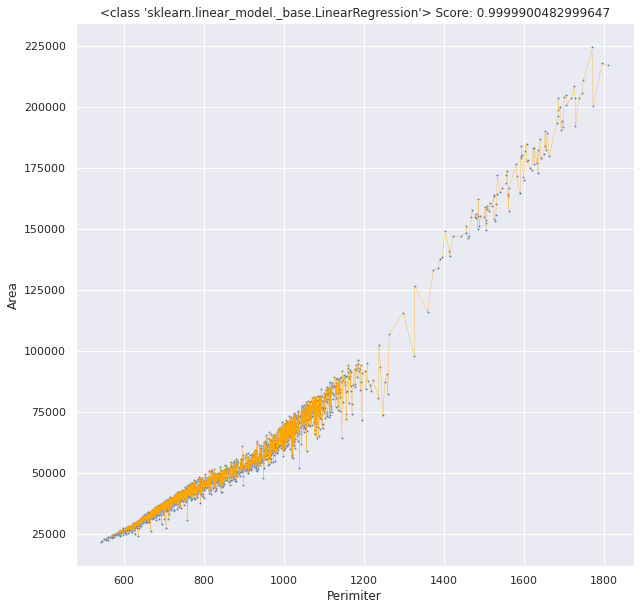

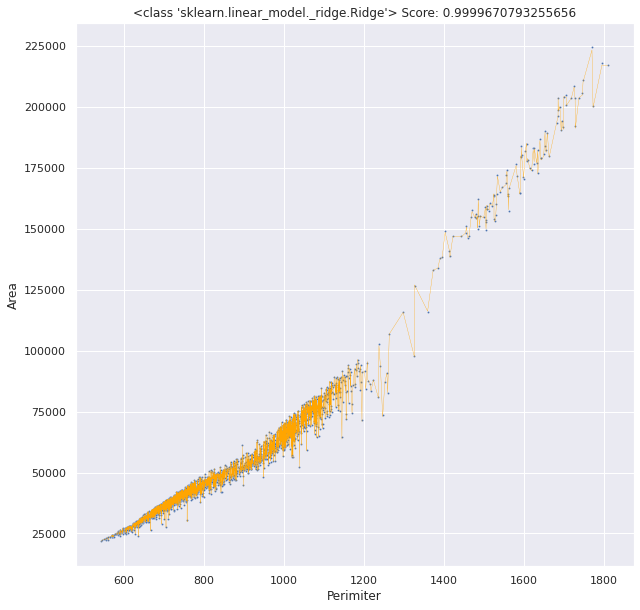

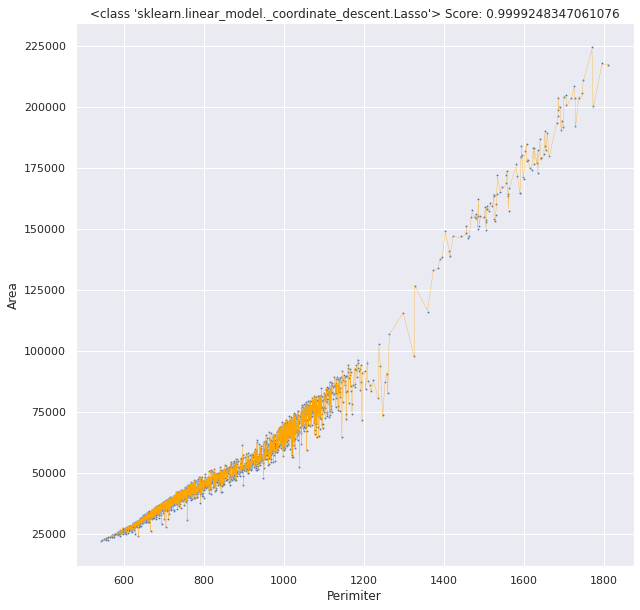

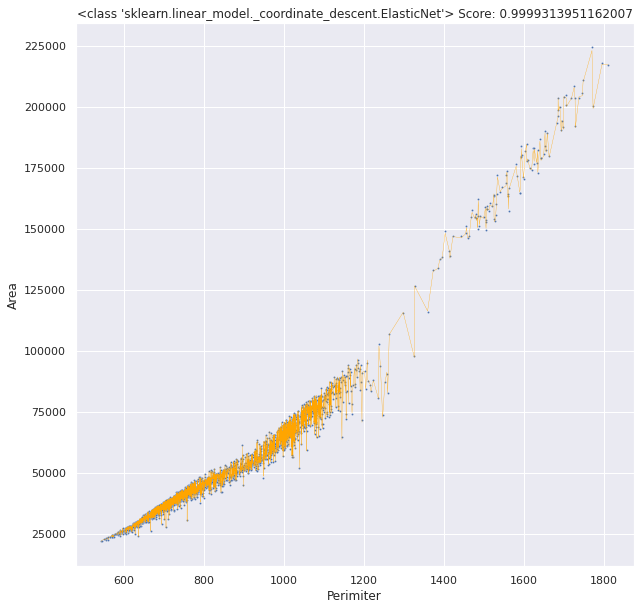

In [6]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

for mod in [LinearRegression, Ridge, Lasso, ElasticNet]:
    if mod != LinearRegression:
        model = mod(max_iter=int(1e6))
    else:
        model = mod()
    model.fit(train[:,1:], train[:,0])


    fig, ax = plt.subplots(figsize=(10, 10))
    plt.title(str(mod) + " Score: " + str(model.score(test[:,1:], test[:,0])))
    plt.xlabel('Perimiter')
    plt.ylabel('Area')

    predicted_y = model.predict(test[:,1:])
    true_y = dataSet[:,0]
    sns.scatterplot(x=test[:,1] , y=test[:,0], s=4, ax=ax)
    sns.lineplot(x=test[:,1] , y=predicted_y, color='orange', linewidth=0.3, ax=ax)
    plt.show()


Naive Bayess:

$P(y \mid x_1, \dots, x_n) = \frac{P(y) \prod_{i=1}^{n} P(x_i \mid y)}
                                 {P(x_1, \dots, x_n)}$

Gauss distribution: $P(x_i \mid y) = \frac{1}{\sqrt{2\pi\sigma^2_y}} \exp\left(-\frac{(x_i - \mu_y)^2}{2\sigma^2_y}\right)$,                            
Bernouli distribution: $P(x_i \mid y) = P(i \mid y) x_i + (1 - P(i \mid y)) (1 - x_i)$

In [ ]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB

for mod in [GaussianNB, BernoulliNB]:
    
    model = mod()
    model.fit(train[:,:-1], train[:,-1])

    out = model.predict(test[:,:-1])
    score = model.score(test[:,:-1], test[:,-1])

    #wizualizacja
    palette = dict(zip(out, sns.color_palette(n_colors=len(out))))
    plt.title(str(mod) + "- score: " + str(score))
    sns.scatterplot(x=test[:,2], y=test[:,4], hue=out, palette=palette )
    plt.show()


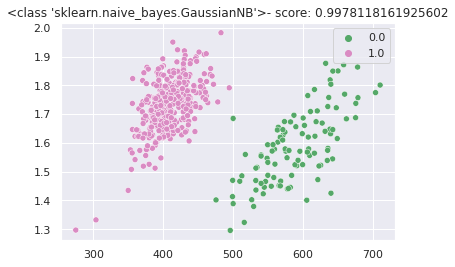

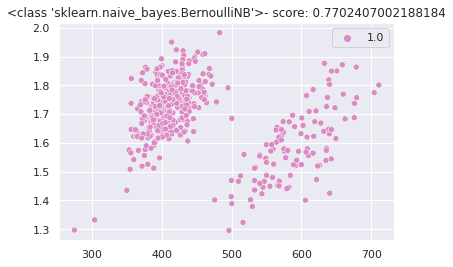

In [8]:
train_bin = train[np.logical_or(train[:,-1] == 0, train[:,-1] == 1)]
test_bin = test[np.logical_or(test[:,-1] == 0, test[:,-1] == 1)]

for mod in [GaussianNB, BernoulliNB]:
    
    model = mod()
    model.fit(train_bin[:,:-1], train_bin[:,-1])

    out = model.predict(test_bin[:,:-1])
    score = model.score(test_bin[:,:-1], test_bin[:,-1])

    palette = dict(zip(out, sns.color_palette(n_colors=len(out))))
    plt.title(str(mod) + "- score: " + str(score))
    sns.scatterplot(x=test_bin[:,2], y=test_bin[:,4], hue=out, palette=palette )
    plt.show()


LDA :

$P(y=k | x) = \frac{P(x | y=k) P(y=k)}{P(x)} = \frac{P(x | y=k) P(y = k)}{ \sum_{l} P(x | y=l) \cdot P(y=l)}$

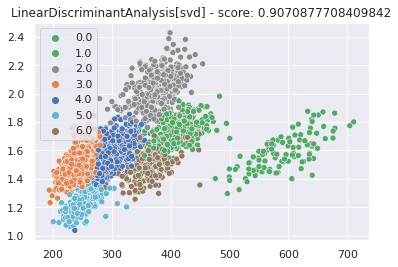

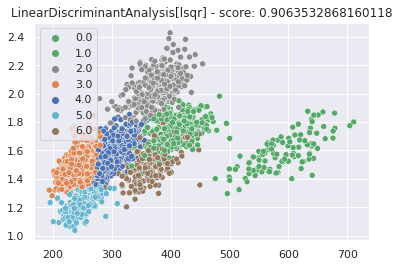

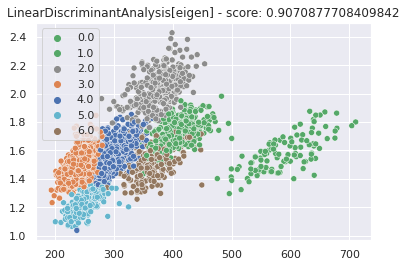

In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

for solver in ["svd", "lsqr", "eigen"]:
    
    model = LinearDiscriminantAnalysis(solver=solver)
    model.fit(train[:,:-1], train[:,-1])

    out = model.predict(test[:,:-1])
    score = model.score(test[:,:-1], test[:,-1])

    palette = dict(zip(out, sns.color_palette(n_colors=len(out))))
    plt.title(f"LinearDiscriminantAnalysis[{solver}] - score: " + str(score))
    sns.scatterplot(x=test[:,2], y=test[:,4], hue=out, palette=palette )
    plt.show()


SVM Kernels:

* linear - $\langle x, x'\rangle$
* polynomial - $(\gamma \langle x, x'\rangle + r)^d$
* rbf - $\exp(-\gamma \|x-x'\|^2)$
* sigmoid - $\tanh(\gamma \langle x,x'\rangle + r)$

In [ ]:
from sklearn.svm import SVC 

for kernel in ["linear", "poly", "rbf", "sigmoid"]:
    
    model = SVC(kernel=kernel)
    model.fit(train[:,:-1], train[:,-1])

    out = model.predict(test[:,:-1])
    score = model.score(test[:,:-1], test[:,-1])

    palette = dict(zip(out, sns.color_palette(n_colors=len(out))))
    plt.title(str(kernel) + "- score: " + str(score))
    sns.scatterplot(x=test[:,2], y=test[:,4], hue=out, palette=palette )
    plt.show()

In [ ]:
from sklearn.svm import SVR

for kernel in ["linear", "poly", "rbf", "sigmoid"]:
    
    model = SVR(kernel=kernel)

    model.fit(train[:,1:], train[:,0])

    fig, ax = plt.subplots(figsize=(10, 10))
    plt.title(kernel + " Score: " + str(model.score(test[:,1:], test[:,0])))
    plt.xlabel('Perimiter')
    plt.ylabel('Area')

    predicted_y = model.predict(test[:,1:])
    true_y = dataSet[:,0]
    sns.scatterplot(x=test[:,1] , y=test[:,0], s=4, ax=ax)
    sns.lineplot(x=test[:,1] , y=predicted_y, color='orange', linewidth=0.3, ax=ax)
    plt.show()

MLP - multilayer percepron

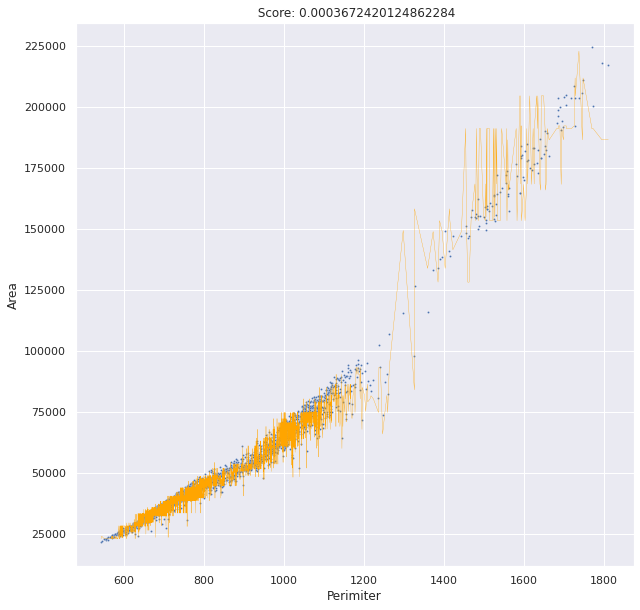

In [6]:
from sklearn.neural_network import MLPClassifier


model = MLPClassifier(activation='identity', 
                      solver='adam', 
                      alpha=1e-5, 
                      hidden_layer_sizes=(3, 4), 
                      nesterovs_momentum=True, 
                      verbose=True, 
                      tol=1e-3,
                      max_iter=1000)

model.fit(train[:,1:], train[:,0])

fig, ax = plt.subplots(figsize=(10, 10))
plt.title(" Score: " + str(model.score(test[:,1:], test[:,0])))
plt.xlabel('Perimiter')
plt.ylabel('Area')

predicted_y = model.predict(test[:,1:])
true_y = dataSet[:,0]
sns.scatterplot(x=test[:,1] , y=test[:,0], s=4, ax=ax)
sns.lineplot(x=test[:,1] , y=predicted_y, color='orange', linewidth=0.3, ax=ax)
plt.show()